In [80]:
# import necessary packages for geospatial analysis and data processing
import esda
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame
import libpysal as lps
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point
import mapclassify as mc

print("Packages imported successfully!")

Packages imported successfully!


# NYS Map

In [81]:
map_data = gpd.read_file('./NY_Waterbody_List.geojson')
map_data = GeoDataFrame(map_data)

map_data.set_crs(epsg=4326, inplace=True)
map_data

,OBJECTID,PWL_ID,NAME,DESCRIPT,BASIN,FACT_SHEET,SHAPE_Length,SHAPE_Area,geometry
0,1,0301-0043,Lyndonville Reservoir,entire reservoir,Lake Ontario,https://www.dec.ny.gov/data/WQP/PWL/0301-0043.pdf,0.015856,0.000006,"MULTIPOLYGON (((-78.38929 43.32251, -78.38925 ..."
1,2,0301-0047,Middleport Reservoir,entire reservoir,Lake Ontario,https://www.dec.ny.gov/data/WQP/PWL/0301-0047.pdf,0.009788,0.000003,"MULTIPOLYGON (((-78.47488 43.19064, -78.47483 ..."
2,3,0302-0001,Irondequoit Bay,entire bay,Lake Ontario,https://www.dec.ny.gov/data/WQP/PWL/0302-0001....,0.299554,0.000744,"MULTIPOLYGON (((-77.51777 43.23899, -77.51773 ..."
3,4,0302-0011,East Bay,entire bay,Lake Ontario,https://www.dec.ny.gov/data/WQP/PWL/0302-0011....,0.105549,0.000072,"MULTIPOLYGON (((-76.88962 43.28737, -76.88976 ..."
4,5,0302-0012,Port Bay,entire bay,Lake Ontario,https://www.dec.ny.gov/data/WQP/PWL/0302-0012....,0.125191,0.000207,"MULTIPOLYGON (((-76.83266 43.30427, -76.83271 ..."
...,...,...,...,...,...,...,...,...,...
2091,2092,1301-0173,"Bog Meadow Pond, Jims Pond",total area of both lakes,Lower Hudson River,https://www.dec.ny.gov/data/WQP/PWL/1301-0173....,0.058966,0.000024,"MULTIPOLYGON (((-74.01137 41.39300, -74.01136 ..."
2092,2093,1701-0311,Unnamed (Eastport) Pond,entire pond,Atlantic-Long Island Sound,https://www.dec.ny.gov/data/WQP/PWL/1701-0311.pdf,0.025037,0.000012,"MULTIPOLYGON (((-72.72531 40.83211, -72.72545 ..."
2093,2094,1701-0258,Merritts Pond,entire lake,Atlantic-Long Island Sound,https://www.dec.ny.gov/data/WQP/PWL/1701-0258.pdf,0.018157,0.000007,"MULTIPOLYGON (((-72.66604 40.92863, -72.66605 ..."
2094,2095,1702-0105,The Lake in Central Park,entire lake,Atlantic-Long Island Sound,https://www.dec.ny.gov/data/WQP/PWL/1702-0105....,0.021927,0.000006,"MULTIPOLYGON (((-73.97230 40.77838, -73.97220 ..."


In [82]:
distance = pd.read_csv("./nys_outage_waterbody_distances.csv")
distance = distance.dropna()
distance = distance.drop_duplicates()
distance 

,Unnamed: 0,OPCO,CustomerCount,CircuitVoltage,Division,CauseDesc,faultlatitude,faultlongitude,geometry,nearest_waterbody_idx,nearest_waterbody_distance_km
0,2,NYSEG,26,4800.0,Liberty,Pole Damage/Failure - Tree Outside ROW,41.605574,-74.734750,POINT (-74.73475 41.605574),1327,1.696401
1,3,NYSEG,1,4800.0,Liberty,Conductor Down - Tree Outside ROW,41.844256,-74.801340,POINT (-74.80134 41.844256),1356,2.655544
2,4,NYSEG,16,12470.0,Oneonta,Conductor Down - Tree Inside ROW,42.038159,-75.299120,POINT (-75.29912 42.038159),1591,2.847123
3,8,NYSEG,130,4800.0,Hornell,Animal - Bird Contact,42.553013,-77.723435,POINT (-77.723435 42.553013),165,17.313512
4,12,NYSEG,1,2400.0,Lockport,Other - Pre Arranged,43.154048,-78.682774,POINT (-78.682774 43.154048),1,23.364983
...,...,...,...,...,...,...,...,...,...,...,...
86768,176915,RGE,56,12470.0,Central,Tree/Branch on Conductor Inside ROW,43.068282,-77.580587,POINT (-77.580587 43.068282),48,4.702441
86769,176923,RGE,2,12470.0,Central,Animal - Squirrel Contact,43.144830,-77.456874,POINT (-77.456874 43.14483),2,10.520434
86770,176974,RGE,18,34500.0,Fillmore,OH Transformer Failure,42.193723,-78.058460,POINT (-78.05846 42.193723),76,8.487308
86771,176981,RGE,30,12470.0,Sodus,Animal - Squirrel Contact,43.291653,-76.613531,POINT (-76.613531 43.291653),57,8.075796


In [83]:
osprey_nests = pd.read_excel('Osprey Data, Confirmed Nests as of 8.2.2023.xlsx', sheet_name='Outages, 2018-Current')
osprey_nests = osprey_nests[['CauseDesc', 'Division', 'OPCO','faultlatitude','faultlongitude', "CustomerCount"]]
osprey_nests = osprey_nests.dropna()
osprey_nests = osprey_nests.drop_duplicates()
osprey_nests = osprey_nests.loc[(osprey_nests["OPCO"] == "NYSEG") | (osprey_nests["OPCO"] == "RGE")]
osprey_nests

,CauseDesc,Division,OPCO,faultlatitude,faultlongitude,CustomerCount
0,Animal - Bird Contact,Binghamton,NYSEG,42.121093,-75.740825,17.0
1,Animal - Bird Contact,Central,RGE,43.078867,-77.517980,7.0
2,Animal - Bird Contact,Geneva,NYSEG,43.105887,-77.005098,23.0
3,Animal - Bird Contact,Lancaster,NYSEG,42.841644,-78.576785,1.0
4,Animal - Bird Contact,Oneonta,NYSEG,42.604576,-74.894697,3.0
...,...,...,...,...,...,...
11005,Animal - Bird Contact,Binghamton,NYSEG,42.070017,-76.264844,7.0
11006,Animal - Bird Contact,Lancaster,NYSEG,42.796246,-78.750392,1.0
11014,Animal - Bird Contact,Canandaigua,RGE,42.919738,-77.324119,1.0
11016,Animal - Bird Contact,Plattsburgh,NYSEG,43.171213,-77.719802,42.0


In [84]:
new = osprey_nests.merge(distance, on = ['CauseDesc', 'Division', 'OPCO','faultlatitude','faultlongitude'], how = 'left')
osprey_nests = new.dropna()
osprey_nests

,CauseDesc,Division,OPCO,faultlatitude,faultlongitude,CustomerCount_x,Unnamed: 0,CustomerCount_y,CircuitVoltage,geometry,nearest_waterbody_idx,nearest_waterbody_distance_km
0,Animal - Bird Contact,Binghamton,NYSEG,42.121093,-75.740825,17.0,5682.0,17.0,4800.0,POINT (-75.740825 42.121093),96.0,1.912343
1,Animal - Bird Contact,Central,RGE,43.078867,-77.517980,7.0,5740.0,7.0,12470.0,POINT (-77.51798 43.078867),37.0,5.291268
2,Animal - Bird Contact,Geneva,NYSEG,43.105887,-77.005098,23.0,5828.0,23.0,4800.0,POINT (-77.005098 43.105887),99.0,8.001346
3,Animal - Bird Contact,Lancaster,NYSEG,42.841644,-78.576785,1.0,6063.0,1.0,4800.0,POINT (-78.576785 42.841644),13.0,18.699584
4,Animal - Bird Contact,Oneonta,NYSEG,42.604576,-74.894697,3.0,6273.0,3.0,4800.0,POINT (-74.894697 42.604576),206.0,6.006427
...,...,...,...,...,...,...,...,...,...,...,...,...
3917,Animal - Bird Contact,Geneva,NYSEG,42.819292,-76.806759,24.0,160930.0,1.0,12470.0,POINT (-76.806759 42.819292),382.0,10.248532
4022,Animal - Bird Contact,Auburn,NYSEG,42.939249,-76.563642,18.0,106778.0,19.0,12470.0,POINT (-76.563642 42.939249),294.0,13.081543
4049,Animal - Bird Contact,Mechanicville,NYSEG,42.154212,-73.517448,2.0,95940.0,65.0,34500.0,POINT (-73.517448 42.154212),1821.0,2.870460
4060,Animal - Bird Contact,Brewster,NYSEG,41.267643,-73.679165,3.0,173749.0,7.0,13200.0,POINT (-73.679165 41.267643),1061.0,2.346213


In [85]:
osprey_nests["nearest_waterbody_distance_km"].describe()

count    1604.000000
mean        8.695737
std         5.771063
min         0.268357
25%         3.990935
50%         7.653281
75%        11.805420
max        30.467891
Name: nearest_waterbody_distance_km, dtype: float64

Text(0.5, 0, 'Distance to Water (km)')

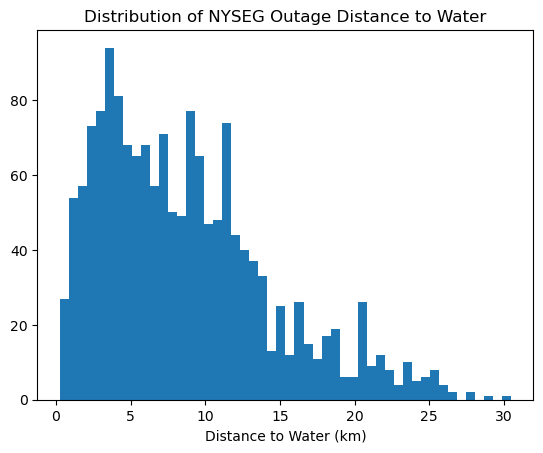

In [86]:
plt.hist(osprey_nests["nearest_waterbody_distance_km"], bins = 50)
plt.title("Distribution of NYSEG Outage Distance to Water")
plt.xlabel("Distance to Water (km)")

In [87]:
# Convert pandas DataFrame to GeoDataFrame
osprey_nests = gpd.GeoDataFrame(osprey_nests, geometry=gpd.points_from_xy(osprey_nests.faultlongitude, osprey_nests.faultlatitude))

In [88]:
geometry = [Point(xy) for xy in zip(osprey_nests.faultlongitude, osprey_nests.faultlatitude)]
crs = {'init': 'epsg:4326'}
osprey_nests_gdf = GeoDataFrame(osprey_nests, crs=crs, geometry=geometry)

/Users/ZhongxuanChen/opt/anaconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [89]:
osprey_nests_gdf

,CauseDesc,Division,OPCO,faultlatitude,faultlongitude,CustomerCount_x,Unnamed: 0,CustomerCount_y,CircuitVoltage,geometry,nearest_waterbody_idx,nearest_waterbody_distance_km
0,Animal - Bird Contact,Binghamton,NYSEG,42.121093,-75.740825,17.0,5682.0,17.0,4800.0,POINT (-75.74083 42.12109),96.0,1.912343
1,Animal - Bird Contact,Central,RGE,43.078867,-77.517980,7.0,5740.0,7.0,12470.0,POINT (-77.51798 43.07887),37.0,5.291268
2,Animal - Bird Contact,Geneva,NYSEG,43.105887,-77.005098,23.0,5828.0,23.0,4800.0,POINT (-77.00510 43.10589),99.0,8.001346
3,Animal - Bird Contact,Lancaster,NYSEG,42.841644,-78.576785,1.0,6063.0,1.0,4800.0,POINT (-78.57679 42.84164),13.0,18.699584
4,Animal - Bird Contact,Oneonta,NYSEG,42.604576,-74.894697,3.0,6273.0,3.0,4800.0,POINT (-74.89470 42.60458),206.0,6.006427
...,...,...,...,...,...,...,...,...,...,...,...,...
3917,Animal - Bird Contact,Geneva,NYSEG,42.819292,-76.806759,24.0,160930.0,1.0,12470.0,POINT (-76.80676 42.81929),382.0,10.248532
4022,Animal - Bird Contact,Auburn,NYSEG,42.939249,-76.563642,18.0,106778.0,19.0,12470.0,POINT (-76.56364 42.93925),294.0,13.081543
4049,Animal - Bird Contact,Mechanicville,NYSEG,42.154212,-73.517448,2.0,95940.0,65.0,34500.0,POINT (-73.51745 42.15421),1821.0,2.870460
4060,Animal - Bird Contact,Brewster,NYSEG,41.267643,-73.679165,3.0,173749.0,7.0,13200.0,POINT (-73.67916 41.26764),1061.0,2.346213


<Axes: >

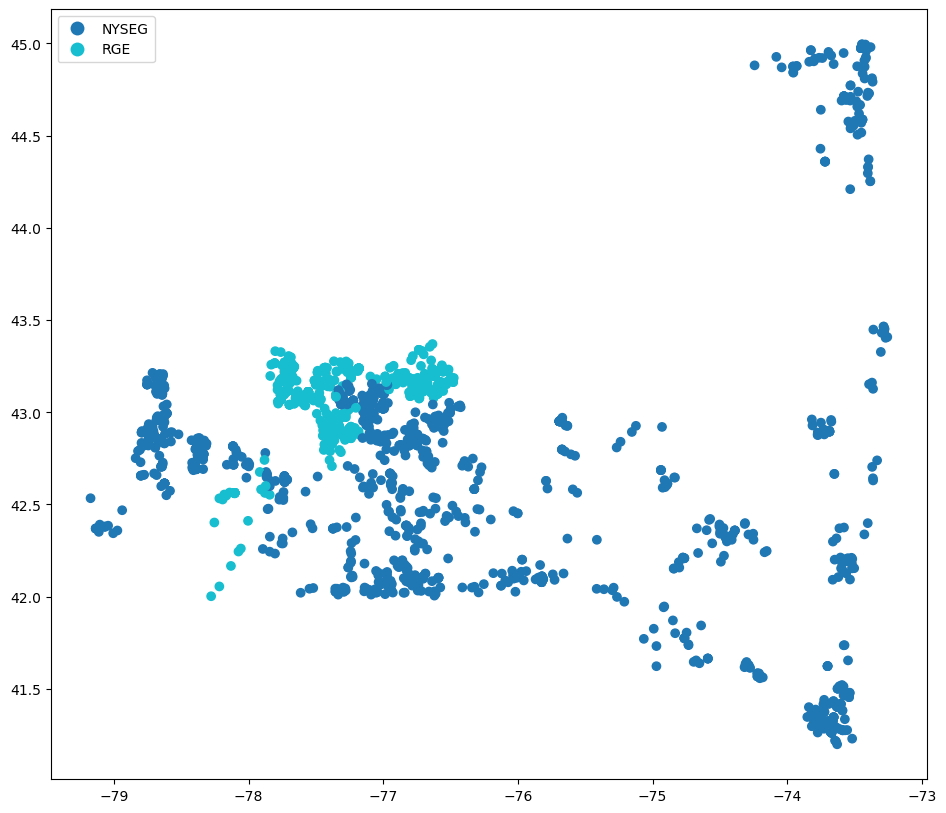

In [90]:
fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
osprey_nests_gdf.plot(column='OPCO', k=5, legend=True, ax=ax)

<Axes: >

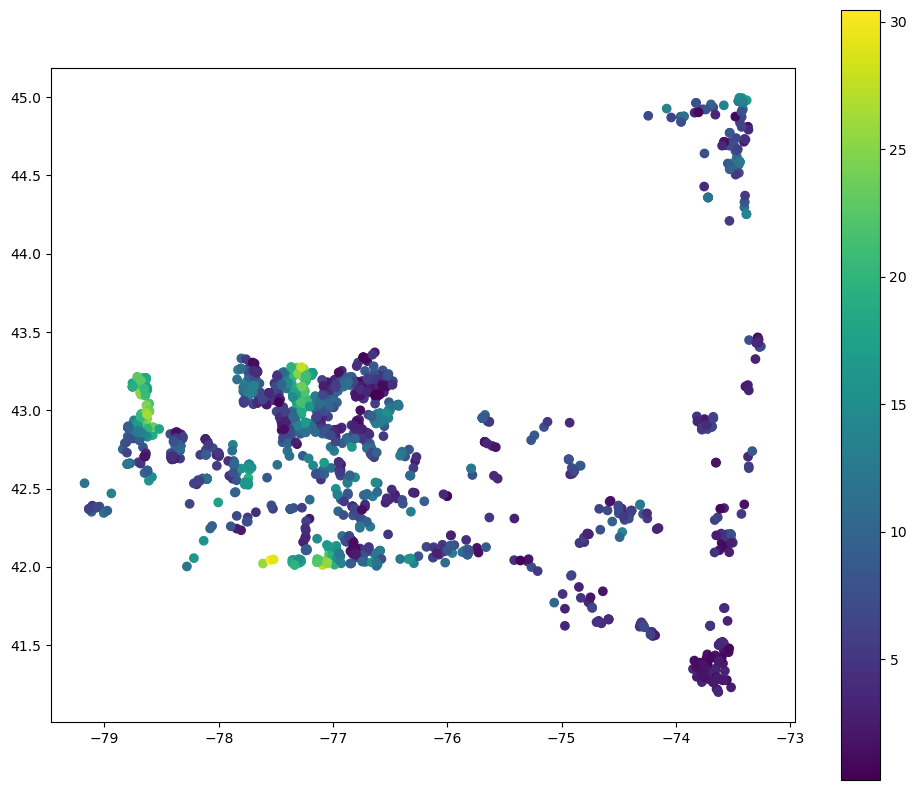

In [91]:
fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
osprey_nests_gdf.plot(column='nearest_waterbody_distance_km', k=5, legend=True, ax=ax)

# Spatial Autocorrelation Analysis

In [92]:
df = osprey_nests_gdf
df

,CauseDesc,Division,OPCO,faultlatitude,faultlongitude,CustomerCount_x,Unnamed: 0,CustomerCount_y,CircuitVoltage,geometry,nearest_waterbody_idx,nearest_waterbody_distance_km
0,Animal - Bird Contact,Binghamton,NYSEG,42.121093,-75.740825,17.0,5682.0,17.0,4800.0,POINT (-75.74083 42.12109),96.0,1.912343
1,Animal - Bird Contact,Central,RGE,43.078867,-77.517980,7.0,5740.0,7.0,12470.0,POINT (-77.51798 43.07887),37.0,5.291268
2,Animal - Bird Contact,Geneva,NYSEG,43.105887,-77.005098,23.0,5828.0,23.0,4800.0,POINT (-77.00510 43.10589),99.0,8.001346
3,Animal - Bird Contact,Lancaster,NYSEG,42.841644,-78.576785,1.0,6063.0,1.0,4800.0,POINT (-78.57679 42.84164),13.0,18.699584
4,Animal - Bird Contact,Oneonta,NYSEG,42.604576,-74.894697,3.0,6273.0,3.0,4800.0,POINT (-74.89470 42.60458),206.0,6.006427
...,...,...,...,...,...,...,...,...,...,...,...,...
3917,Animal - Bird Contact,Geneva,NYSEG,42.819292,-76.806759,24.0,160930.0,1.0,12470.0,POINT (-76.80676 42.81929),382.0,10.248532
4022,Animal - Bird Contact,Auburn,NYSEG,42.939249,-76.563642,18.0,106778.0,19.0,12470.0,POINT (-76.56364 42.93925),294.0,13.081543
4049,Animal - Bird Contact,Mechanicville,NYSEG,42.154212,-73.517448,2.0,95940.0,65.0,34500.0,POINT (-73.51745 42.15421),1821.0,2.870460
4060,Animal - Bird Contact,Brewster,NYSEG,41.267643,-73.679165,3.0,173749.0,7.0,13200.0,POINT (-73.67916 41.26764),1061.0,2.346213


In [93]:
wq =  lps.weights.Queen.from_dataframe(df)
wq.transform = 'r'

/var/folders/24/6ckwcq6s11dcd62_z_1k97_h0000gp/T/ipykernel_20221/1595884902.py:1: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  wq =  lps.weights.Queen.from_dataframe(df)


In [94]:
y = df['nearest_waterbody_distance_km']
ylag = lps.weights.lag_spatial(wq, y)

In [95]:
ylagq5 = mc.Quantiles(ylag, k=5)

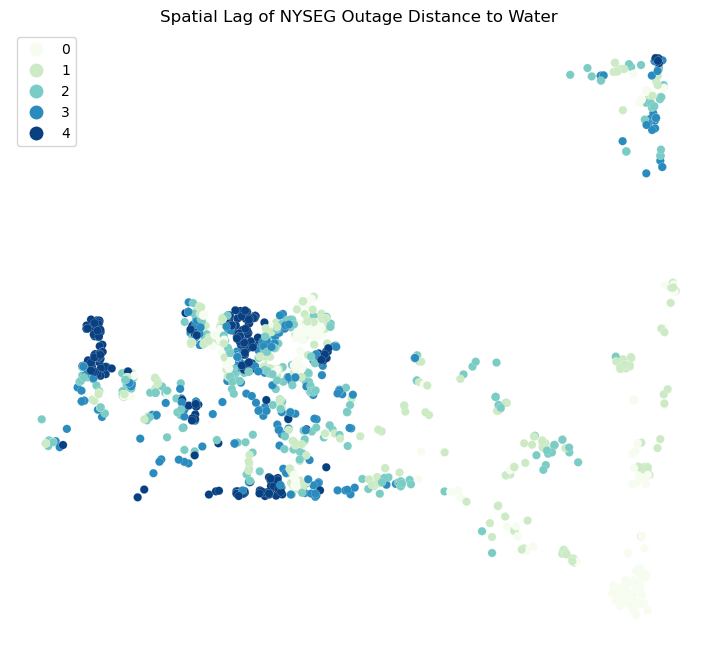

In [96]:
f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=ylagq5.yb).plot(column='cl', categorical=True, \
        k=5, cmap='GnBu', linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.title("Spatial Lag of NYSEG Outage Distance to Water")

plt.show()

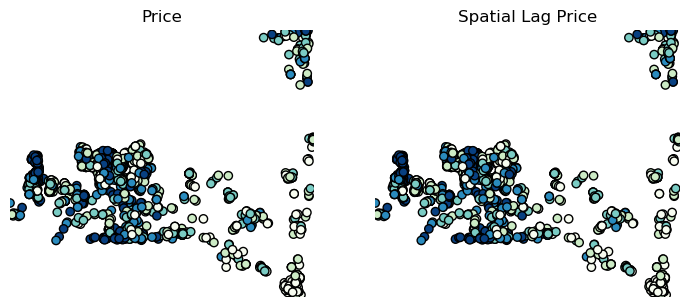

In [97]:
df['lag_median_pri'] = ylag
f,ax = plt.subplots(1,2,figsize=(2.16*4,4))
df.plot(column='nearest_waterbody_distance_km', ax=ax[0], edgecolor='k',
        scheme="quantiles",  k=5, cmap='GnBu')
ax[0].axis(df.total_bounds[np.asarray([0,2,1,3])])
ax[0].set_title("Price")
df.plot(column='nearest_waterbody_distance_km', ax=ax[1], edgecolor='k',
        scheme='quantiles', cmap='GnBu', k=5)
ax[1].axis(df.total_bounds[np.asarray([0,2,1,3])])
ax[1].set_title("Spatial Lag Price")
ax[0].axis('off')
ax[1].axis('off')
plt.show()

# Global Autocorrelation

In [98]:
wq.transform = 'r'
y = df['nearest_waterbody_distance_km']

In [99]:
np.random.seed(12345)
mi = esda.Moran(y, wq)
mi.I

0.8239886024676213

/var/folders/24/6ckwcq6s11dcd62_z_1k97_h0000gp/T/ipykernel_20221/2386594959.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbn.kdeplot(mi.sim, shade=True)
/Users/ZhongxuanChen/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ZhongxuanChen/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, "Moran's I")

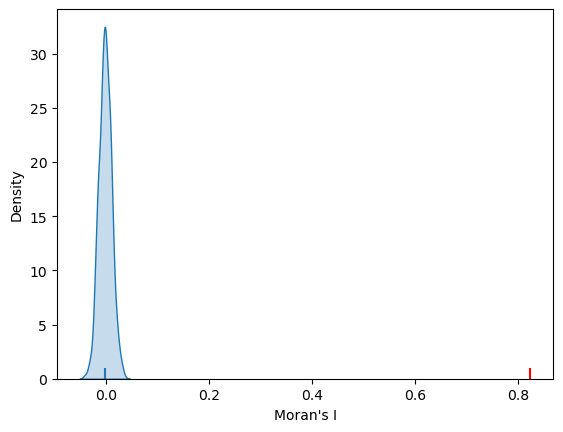

In [100]:
import seaborn as sbn
sbn.kdeplot(mi.sim, shade=True)
plt.vlines(mi.I, 0, 1, color='r')
plt.vlines(mi.EI, 0,1)
plt.xlabel("Moran's I")

In [101]:
mi.p_sim

0.001

# Local Autocorrelation: Hot Spots, Cold Spots, and Spatial Outliers¶

In [102]:
wq.transform = 'r'
lag_price = lps.weights.lag_spatial(wq, df['nearest_waterbody_distance_km'])

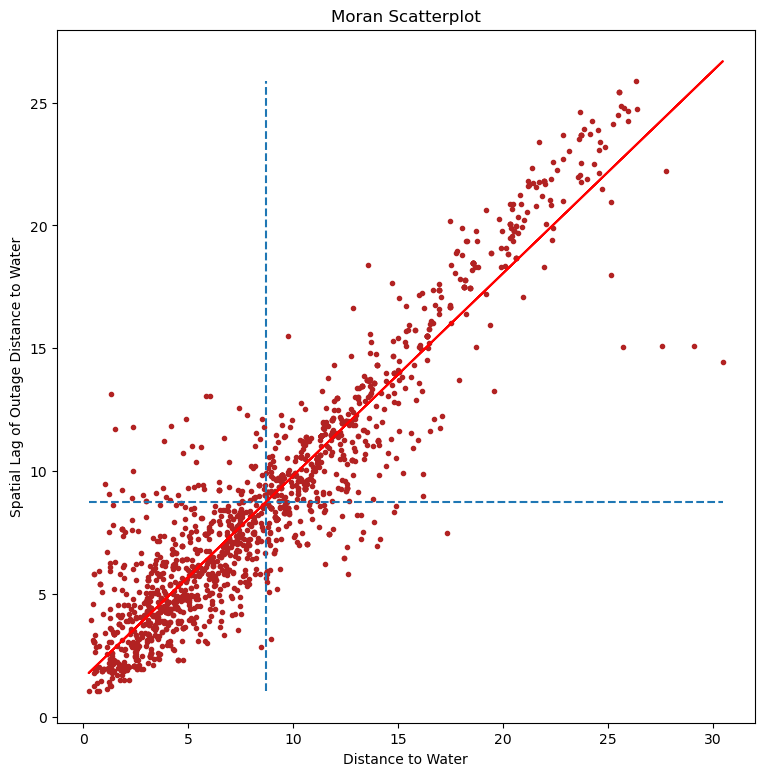

In [103]:
price = df['nearest_waterbody_distance_km']
b, a = np.polyfit(price, lag_price, 1)
f, ax = plt.subplots(1, figsize=(9, 9))

plt.plot(price, lag_price, '.', color='firebrick')

 # dashed vert at mean of the price
plt.vlines(price.mean(), lag_price.min(), lag_price.max(), linestyle='--')
 # dashed horizontal at mean of lagged price
plt.hlines(lag_price.mean(), price.min(), price.max(), linestyle='--')

# red line of best fit using global I as slope
plt.plot(price, a + b*price, 'r')
plt.title('Moran Scatterplot')
plt.ylabel('Spatial Lag of Outage Distance to Water')
plt.xlabel('Distance to Water')
plt.show()

In [104]:
li = esda.moran.Moran_Local(y, wq)

In [105]:
li_q = li.q

In [106]:
np.unique(li_q)

array([1, 2, 3, 4])

In [107]:
li.p_sim.min()

0.001

In [108]:
(li.p_sim < 0.001).sum()

0

In [109]:
sig = 1 * (li.p_sim < 0.05)
hotspot = 1 * (sig * li.q==1)
coldspot = 3 * (sig * li.q==3)
doughnut = 2 * (sig * li.q==2)
diamond = 4 * (sig * li.q==4)
spots = hotspot + coldspot + doughnut + diamond
spots

array([0, 3, 0, ..., 3, 3, 0])

In [110]:
spots = hotspot + coldspot + doughnut + diamond
spots
spot_labels = ['0 NS', '1 I', '2 II', '3 III', '4 IV']
labels = [spot_labels[i] for i in spots]

/Users/ZhongxuanChen/opt/anaconda3/lib/python3.9/site-packages/geopandas/plotting.py:314: UserWarning: You passed a edgecolor/edgecolors ('white') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  collection = ax.scatter(x, y, vmin=vmin, vmax=vmax, cmap=cmap, **kwargs)


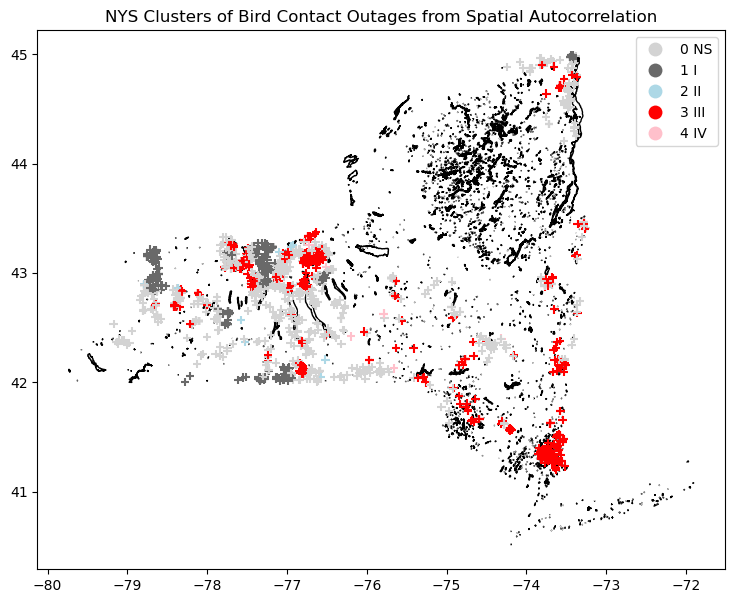

In [111]:
from matplotlib import colors
base = map_data.plot(color='white', edgecolor='black', figsize=(10,7))
hmap = colors.ListedColormap(['lightgrey', 'dimgray', 'lightblue', 'red', 'pink'])

# f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=labels).plot(marker = "+", column='cl', categorical=True, \
        k=2, cmap=hmap, ax=base, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.title("NYS Clusters of Bird Contact Outages from Spatial Autocorrelation")
plt.show()

In [112]:
df["labels"] = labels
df_hotspot = df[df["labels"] == "1 I"]
print(len(df_hotspot))
df_doughnut = df[df["labels"] == "2 II"]
print(len(df_doughnut))
df_coldspot= df[df["labels"] == "3 III"]
print(len(df_coldspot))
df_diamond = df[df["labels"] == "4 IV"]
print(len(df_diamond))
df_ns= df[df["labels"] == "0 NS"]
print(len(df_ns))

317
9
448
7
823
